In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# function takes result file and returns GO_ID and array of coefficients
def get_coeff(input_file):
    results = open(input_file)
    nextline = 0
    for line in results:
        data = line.split()
        if data[1] == 'Prediction':
            GO_ID = data[len(data)-1]
        elif data[1] == 'Coefficients:':
            nextline = 1
        elif nextline == 1:
            coeffs = (data)
            break
    return [GO_ID, coeffs]

In [45]:
# function takes GO term, array of coefficients, and (optional) highlighted tissues, and plots accordingly
def plot_coeff(GO_ID, coeffs, highlight = []):
    samples = open('../data/samples_to_tissues_map.txt')
    tissue_type = np.loadtxt(samples,dtype='S40',delimiter='\t')
    tissue_list = pd.unique(tissue_type[:,2]) # pandas maintains correct order, numpy doesn't
    
    x = [np.where(tissue_list == tissue)[0][0] for tissue in tissue_type[:,2]]
    plt.figure(figsize=(18, 6))
    plt.plot(x, coeffs, 'bo')
    plt.margins(0.01)
    ax = plt.gca()
    ax.xaxis.grid(which='both')
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(range(len(tissue_list)), tissue_list, rotation='vertical')
    # Pad margins so that markers don't get clipped by the axes
    
    # Tweak spacing to prevent clipping of tick-labels
    # plt.subplots_adjust(bottom=0.15)
    plt.show()
    
    """
    tissue_type = np.zeros((8555,3),dtype=np.str)
    row = -1
    
    for sample in samples:
        if row < 0:
            row = row + 1
            continue
        tissue_type[row,:] = sample.split('\t')
    print tissue_type
    """

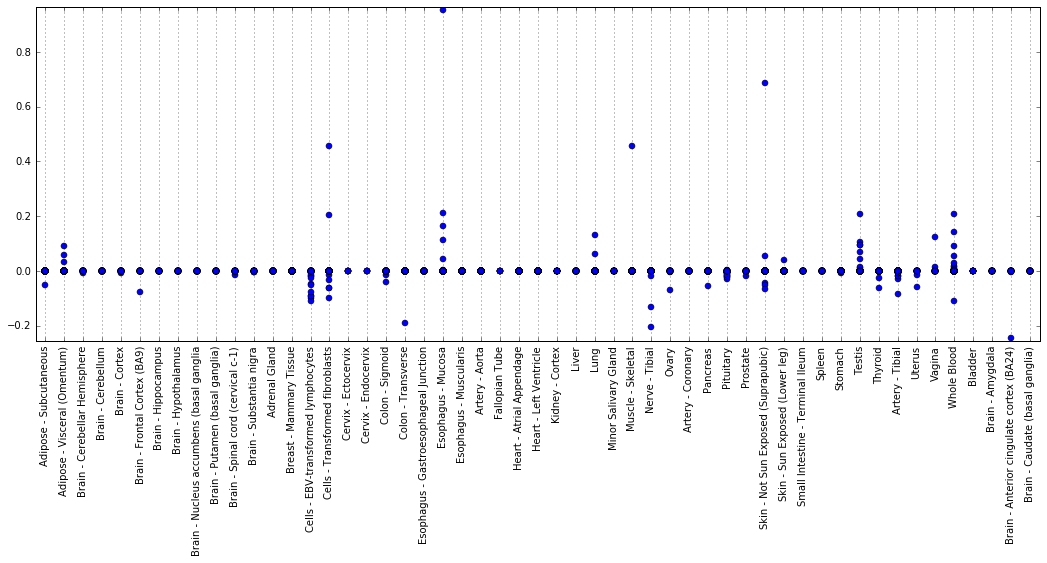

In [46]:
[GO_ID, coeffs] = get_coeff('../GO_prediction/test_result_with_coefficients_logreg_GO:0001909.txt')
plot_coeff(GO_ID,coeffs)